 ***1. Intro***  

Hola learners! Welcome to week 2 of CSOC (ML). This week we'll be reviewing Multi-Layered Perceptron.

The Data we are working on is the 'Wisconsin Breast Cancer Prediction Dataset'.

The dataset presents a classic machine learning problem i.e. to identify where the tumour is malignant or benign.

Before you start, know that you are free to experiment with the dataset. The given assignment is only the minimum requirement especially targetted at beginners. People with some experience can for example do some data visualization, look into using pca(principal component analysis) on features before feeding them into mlp and comparing the difference etc.


***2. What is ANN?***



2-1) ANN(Artificial Neural Network)

*   The Artificial Neural Network consists of an input layer, a hidden layer, and an output layer.![alt text](https://elogeel.files.wordpress.com/2010/05/050510_1627_multilayerp1.png)

2-2) SLP(Single Layer Perceptron)

*   If ANN model has no hidden layer, it is called single layer perceptron.![alt text](https://www.analyticsvidhya.com/wp-content/uploads/2016/07/SLP.png)


2-3) Basic equation of ANN-SLP


*   **Output = Weight * Input + Bias**
*   For this equation, we already have output, input layers. But don't have weight value and bias value.
*   Weight : a value that can give different weights depending on features and output => [len(features), len(output)]
*   bias : a value that can give different weights depending on features => [len(output)]


2-4) MLP(Multi Layer Perceptron)


*   MLP(Multiple Layer Perceptron) model is ANN which has multiple hidden layers (more than 1)
![alt text](https://www.cc.gatech.edu/~san37/img/dl/mlp.png)


2-5) Basic equation of ANN-MLP


*   **Output = (Weight1 x Input1) + (Weight2 x Input2) + ... + (WeightN x InputN) + Bias**
*   For this equation, we already have output, input layers. But don't have weight value and bias value.
*   Weight : a value that can give different weights depending on features and output => [len(features), len(output)]
*   bias : a value that can give different weights depending on features => [len(output)]















In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***3. Importing the Libraries***

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***4. Explore Data***

4-1) Import data

In [3]:
wbcd = pd.read_csv("/content/drive/My Drive/wbcd.csv")
wbcd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print("This WBCD dataset is consisted of",wbcd.shape)

This WBCD dataset is consisted of (569, 33)


4-2) Eliminate the NaN values

In [0]:
wbcd.dropna(axis=1,how='all',inplace=True)  #removed the last column in which all values were NaN

In [6]:
print(wbcd.isnull().any())     #checking whether any other column has NaN value or not

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

4-3)Show summary of the diagnosis(use sns.countplot)

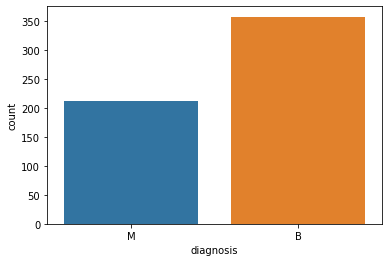

In [7]:
sns.countplot(x=wbcd.diagnosis,y=None,data=wbcd)   #plotting the number of benign and malignant cases

4-4) Correlation Plot of 30 features(use sns.heatmap)

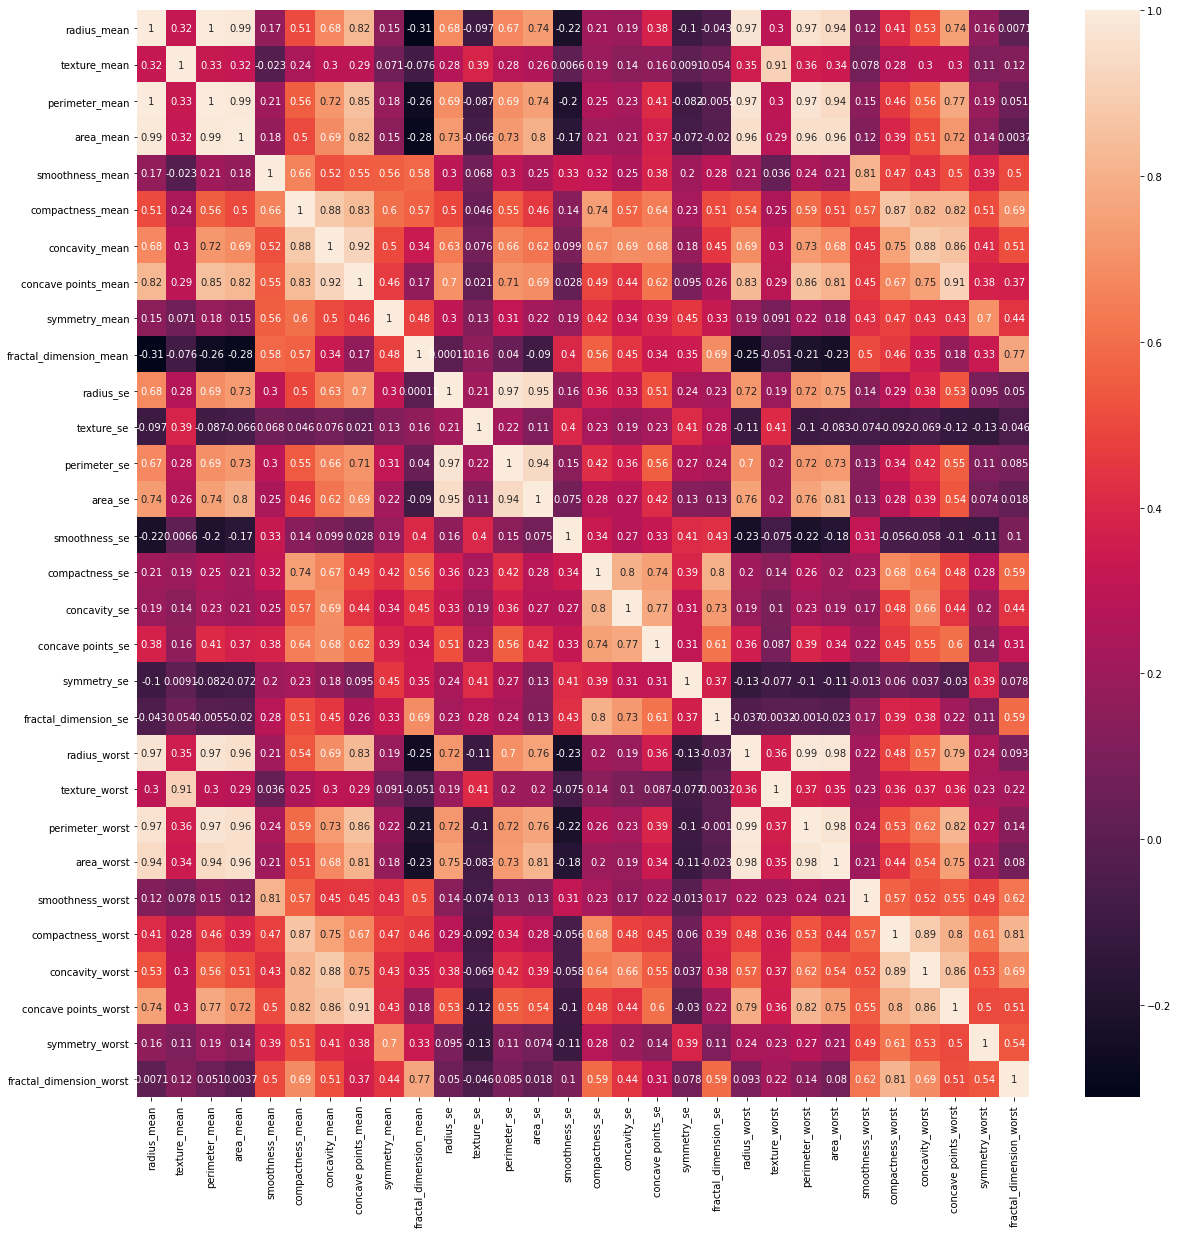

In [8]:
fig,ax=plt.subplots(figsize=(20,20))
corr=(wbcd.drop(columns=['id','diagnosis'])).corr()
sns.heatmap(corr,annot=True)                                        #plotting heatmap for the 30 features in the dataset

***5. Preparing Data for machine learning***

5-1) Divide "WBCD data" into Train(70%) / Test data(30%)

> Divide the data into two(train/test) to see the predictive power of the model.



5-2) Drop ID column
>

*   Save the ID column for later combination(results).
*   Drop the ID column in train, test datasets, because it's unnecessary for model learning predictions.



5-3) Seperate x:Feature data(30) / y:Result data(1)

>Seperate by x_data, y_data 


*   List x_data : columns(features to predict diagnosis) for training. (eliminate diagnosis)
*   y_data : columns for comparing with predictions results. (need original diagnosis)





5-3-1) Normalize x_data values for better prediction using MinMaxScaler

5-3-2) Change Results(diagnosis) format : String -> Numeric

Note :- 
I combined all the functions given above but are not in the same order as given above.

In [0]:
Y=np.array(wbcd["diagnosis"].replace({'B':0,'M':1}))      #converting the string data of diagnosis into classes for feeding into MLP
patient_id=np.array(wbcd["id"])                           #storing the id for future reference
X=np.array(wbcd.drop(columns=['id','diagnosis']))         #dropping the id and diagnosis to make the dataset contain only numerical features

In [0]:
Y=Y.reshape(-1,1)
patient_id=patient_id.reshape(-1,1)

In [0]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)                                   #normalizing x_values

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,shuffle=False)     #shuffle should be false otherwise patient_id will get mismatched

***6. Make MLP Model***

6-1) ANN - MLP Model

*   train_x, test_x : normalization data
*   30 features
*   train_y, test_y



In [13]:
model=Sequential()
model.add(Dense(30,input_shape=(30,),activation=None))
model.add(Dense(40,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(20,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1240      
_________________________________________________________________
batch_normalization (BatchNo (None, 40)                160       
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
batch_normalization_1 (Batch (None, 20)                80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0

In [28]:
model.fit(x_train,y_train,batch_size=64,epochs=10,steps_per_epoch=5,verbose=0,validation_split=0.1)   #this statement was run several times before best weights were found

In [29]:
model.evaluate(x_train,y_train)

13/13 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9824


[0.06100285425782204, 0.9824120402336121]

In [0]:
#model.save('/content/drive/My Drive/wbcd.h5')

In [0]:
model=load_model('/content/drive/My Drive/wbcd.h5')    #this file is the h5 file in which the model is stored

***7. Results***

In [31]:
model.evaluate(x_test,y_test)   #for evaluating the model use the model which has been stored in the h5 file

6/6 [==============================] - 0s 3ms/step - loss: 0.0543 - accuracy: 0.9942


[0.054315801709890366, 0.9941520690917969]

In [0]:
classlist=['Benign','Malignant']

In [0]:
def prediction(x):                                              #prediction function which predicts the result whether it is benign or malignant
  x=x.reshape(-1,30)
  res=model.predict(x)
  if res<0.5:
    print(classlist[0])
  elif res>=0.5:
    print(classlist[1])

In [34]:
prediction(x_test[3])                     #example

Benign
